# Исследование надежности заемщиков


## Информация о проекте

Заказчик — кредитный отдел банка.
Необходимо определить: влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок.
Анализируемые данные — статистика о платёжеспособности клиентов.

In [1]:
import pandas as pd

try:
    data = pd.read_csv('data.csv')
except:
    data = pd.read_csv('https://********/data.csv')

data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

In [3]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполним пропуски в этом столбце медианным значением по каждому типу из столбца `income_type`.

In [4]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

Артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`.

In [5]:
data['days_employed'] = data['days_employed'].abs()

Для каждого типа занятости выведем медианное значение трудового стажа `days_employed` в днях.

In [6]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получились аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть, так как этот столбец не понадобится для исследования.

In [7]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

In [8]:
data = data[(data['children'] != -1) & (data['children'] != 20)]
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

Заполним пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.

In [9]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

In [10]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

Заменим вещественный тип данных

In [11]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

In [12]:
data.duplicated().sum()

54

In [13]:
data = data.drop_duplicates()

In [14]:
data['education'] = data['education'].str.lower()

### Категоризация данных

На основании диапазонов, указанных ниже, создадим в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


In [15]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [16]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

In [17]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

Создадим функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.


In [18]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [19]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

## Исследуем данные

Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [20]:
#импортируем библиотеку seaborn для построения графиков
import seaborn
#проверим, какие значения содержит в себе столбец debt
display(data['debt'].unique())

array([0, 1])

In [21]:
#посчитаем соотношение всех кредитованных к должникам, сгрупированное по количеству детей
try:
    display(data.groupby('children')['debt'].count()/data[data['debt'] == 1].groupby('children')['debt'].count())
except:
    print('Error')

children
0    13.270931
1    10.831081
2    10.577320
3    12.222222
4    10.250000
5          NaN
Name: debt, dtype: float64

### Получим сводную таблицу

Сведем в таблицу данные о людях взявших кредит, должниках, их соотношении и процент должников от общего количества кредитованных, на основе количества детей.

In [22]:
children_grouped = data.groupby('children')[['debt']].count()
children_grouped['debt_sum'] = data.groupby('children')['debt'].sum()
try:
    children_grouped['debt_ratio'] = round(children_grouped['debt_sum']/children_grouped['debt'],3)
    children_grouped['debt_percent'] = round(children_grouped['debt_ratio']*100,3)
except:
    children_grouped['debt_ratio'] = 'NaN'

children_grouped = children_grouped.rename(
columns={
'debt': 'Количество взявших кредит',
'debt_sum': 'Должники',
'debt_ratio': 'Соотношение должников',
'debt_percent': 'Процент должников'}
)

display(children_grouped)

,Количество взявших кредит,Должники,Соотношение должников,Процент должников
children,,,,
0,14107,1063,0.075,7.5
1,4809,444,0.092,9.2
2,2052,194,0.095,9.5
3,330,27,0.082,8.2
4,41,4,0.098,9.8
5,9,0,0.000,0.0


### График процента должников в зависимости от количества детей

<AxesSubplot:ylabel='Процент должников'>

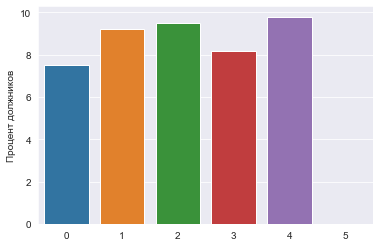

In [23]:
seaborn.barplot(x = [0,1,2,3,4,5], y = children_grouped['Процент должников'])

**Вывод:** Проанализировав данные, можно заметить что семьи с пятью детьми не имеют ни одной задолженности, но это нерепрезентативная выборка, так как в датасете указаны кредиты всего 9 семей с пятью детьми. Больше всего, в процентном соотношении, не выплачивают вовремя семьи с 4 детьми. По графику видно, что семьи без детей чаще выплачивают кредит вовремя, нежели семьи с детьми, и, существует небольшая корреляция между количеством детей и невыплатами кредита в срок, но не уверен, можно ли назвать ее зависимостью.

Есть ли зависимость между семейным положением и возвратом кредита в срок?

### Получим сводную таблицу 
Отразим в таблице количество кредитованных, количество должников, а также их соотношение и процент, сгрупированные по семейному положению

In [24]:
family_status_grouped = data.groupby('family_status')[['debt']].count()
family_status_grouped['Должники'] = data.groupby('family_status')['debt'].sum()
try:
    family_status_grouped['Соотношение должников'] = round(family_status_grouped['Должники']/family_status_grouped['debt'],3)
    family_status_grouped['Процент должников'] = round(family_status_grouped['Соотношение должников']*100,3)
except:
    family_status_grouped['Соотношение должников'] = 'NaN'
    
family_status_grouped = family_status_grouped.rename(
columns={
'debt': 'Количество взявших кредит'}
)

family_status_sorted = family_status_grouped.sort_values(by='Процент должников')


display(family_status_sorted)

,Количество взявших кредит,Должники,Соотношение должников,Процент должников
family_status,,,,
вдовец / вдова,951,63,0.066,6.6
в разводе,1189,84,0.071,7.1
женат / замужем,12266,927,0.076,7.6
гражданский брак,4146,385,0.093,9.3
Не женат / не замужем,2796,273,0.098,9.8


**Вывод:** Из таблицы можно вынести зависимость: чем меньше человек связан (или был связан) семейными отношениями, тем больше вероятность появления задолженности по кредиту. Таким образом можно сказать, что есть зависимость семейного положения человека и его платежеспособностью по кредиту.

Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

### Получим сводную таблицу 
Отразим в таблице количество кредитованных, количество должников, а также их соотношение и процент, сгрупированные по уровню дохода

In [25]:
total_income_grouped = data.groupby('total_income_category')[['debt']].count()
total_income_grouped['Должники'] = data.groupby('total_income_category')['debt'].sum()
try:
    total_income_grouped['Соотношение должников'] = round(total_income_grouped['Должники']/total_income_grouped['debt'],3)
    total_income_grouped['Процент должников'] = round(total_income_grouped['Соотношение должников']*100,3)
except:
    total_income_grouped['Соотношение должников'] = 'NaN'
    
total_income_grouped = total_income_grouped.rename(
columns={
'debt': 'Количество взявших кредит'}
)

display(total_income_grouped)

,Количество взявших кредит,Должники,Соотношение должников,Процент должников
total_income_category,,,,
A,25,2,0.080,8.0
B,5014,354,0.071,7.1
C,15938,1353,0.085,8.5
D,349,21,0.060,6.0
E,22,2,0.091,9.1


### График процента должников в завсисмости от уровня дохода

<AxesSubplot:ylabel='Процент должников'>

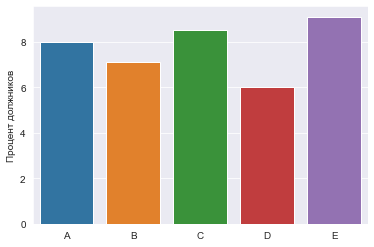

In [26]:
seaborn.barplot(x = ['A','B','C','D','E'], y = total_income_grouped['Процент должников'])

**Вывод:** Между уровнем дохода и возвратом кредита в срок прямой зависимости нет. Анализируя данные можно убрать из внимания уровни дохода А и Е, так как данных достаточно мало для полной картины, при этом получаем, что самыми некредитоспособными получаются люди с доходом от 50 до 200 тысяч, а самыми кредитоспособными с доходом 30-50 тысяч.

Как разные цели кредита влияют на его возврат в срок?

### Получим сводную таблицу 
Отразим в таблице количество кредитованных, количество должников, а также их соотношение и процент, сгрупированные по цели кредита

In [27]:
purpose_category_grouped = data.groupby('purpose_category')[['debt']].count()
purpose_category_grouped['Должники'] = data.groupby('purpose_category')['debt'].sum()
try:
    purpose_category_grouped['Соотношение должников'] = round(purpose_category_grouped['Должники']/purpose_category_grouped['debt'],4)
    purpose_category_grouped['Процент должников'] = round(purpose_category_grouped['Соотношение должников']*100,4)
except:
    purpose_category_grouped['Соотношение должников'] = 'NaN'
    
purpose_category_grouped = purpose_category_grouped.rename(
columns={
'debt': 'Количество взявших кредит'}
)

purpose_category_grouped = purpose_category_grouped.sort_values(by='Процент должников')


display(purpose_category_grouped)

,Количество взявших кредит,Должники,Соотношение должников,Процент должников
purpose_category,,,,
операции с недвижимостью,10754,780,0.0725,7.25
проведение свадьбы,2324,183,0.0787,7.87
получение образования,3989,369,0.0925,9.25
операции с автомобилем,4281,400,0.0934,9.34


**Вывод:** Полагаясь на таблицу, можно сказать, что чаще всего, возникают трудности с возвратом автокредита и кредита на образование, более надежные люди те, кто берут кредит на операции с недвижимостью, или же на проведение свадьбы.

## Общий вывод.

В данном исследовании был обработан датасет клиентов банка для модели скоринга, с целью понять: влияет ли семейное положение и количество детей клиента на способность вернуть кредит в срок? Исходя из полученных выше результатов анализа можно получить, что семейное положение и количество детей клиента действительно влияет на платежеспособность заемщика. Так, самый кредитоспособный клиент, согласно статистике будет вдовец / вдова без детей.
На основе данного исследования можно выделить портреты самого желательного, а также нежелательного клиентов:
 - Самым желательным клиентом будет Вдовец/вдова без детей с доходом от 30 до 50 тысяч который(ая) хочет взять кредит на операции с недвижимостью.
 - Самым нежелательным клиентом будет человек не женатый/не замужем с четырьмя детьми с доходом до 30 тысяч, который(ая) хочет взять кредит на операции с автомобилем